In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [ ]:
# From local file
df = pd.read_csv('/content/loan_prediction.csv')

In [ ]:
# Inspect the dataset
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [ ]:

print(df.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB
None


In [ ]:
# Preprocessing steps
# Separate features and target
X = df.drop(['Loan_Status', 'Loan_ID'], axis=1)
y = df['Loan_Status'].map({'Y': 1, 'N': 0})

In [ ]:
# Identify column types
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education',
                       'Self_Employed', 'Property_Area']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome',
                     'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [ ]:
# Create preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_columns),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_columns)
    ])

In [ ]:
# Create full pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Fit the pipeline
rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
# Predictions
y_pred = rf_pipeline.predict(X_test)


In [ ]:
# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123



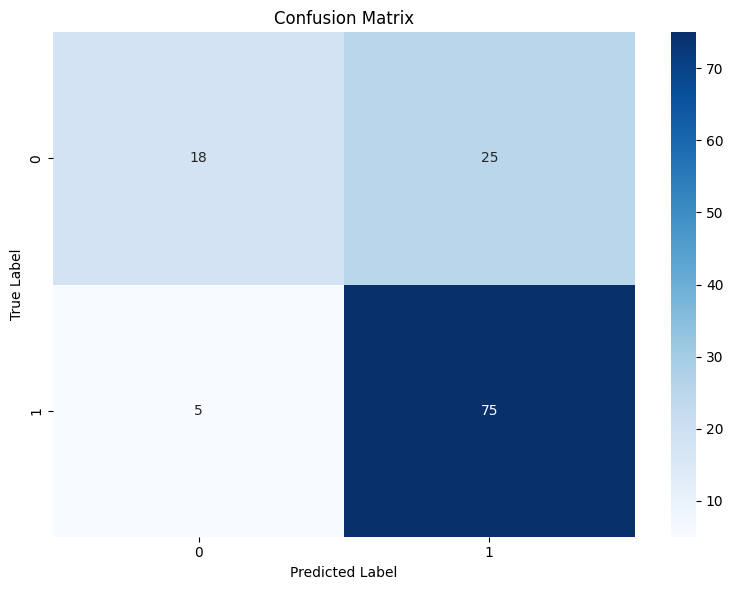

In [ ]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

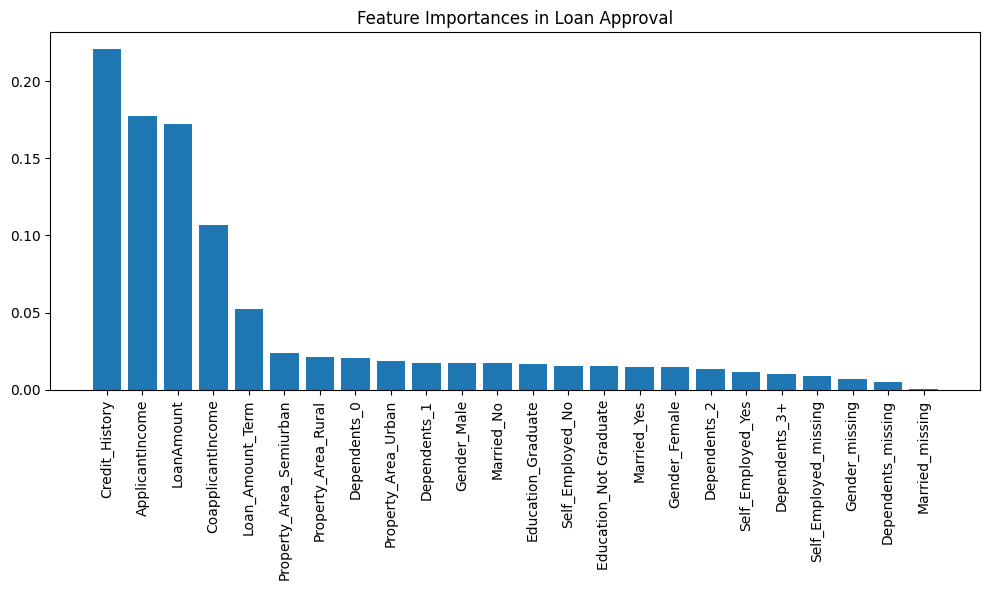

In [ ]:
# Feature Importance
feature_names = (
    numerical_columns +
    list(rf_pipeline.named_steps['preprocessor']
         .named_transformers_['cat']
         .named_steps['onehot']
         .get_feature_names_out(categorical_columns))
)
importances = rf_pipeline.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances in Loan Approval")
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
# Print key metrics
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2%}")

Model Accuracy: 75.61%


In [ ]:
# Evaluate the model
print("Model Performance Metrics:")
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Performance Metrics:

Accuracy Score:
0.7560975609756098

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123


Confusion Matrix:
[[18 25]
 [ 5 75]]


In [ ]:
# Feature importance (if applicable)
if hasattr(rf_pipeline.named_steps['classifier'], 'feature_importances_'): # Changed model to rf_pipeline
    feature_names = (
        numerical_columns +  # Changed numeric_features to numerical_columns
        list(rf_pipeline.named_steps['preprocessor'] # Changed model to rf_pipeline
             .named_transformers_['cat']
             .named_steps['onehot']
             .get_feature_names_out(categorical_columns)) # Changed categorical_features to categorical_columns
    )

    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': rf_pipeline.named_steps['classifier'].feature_importances_ # Changed model to rf_pipeline
    }).sort_values('importance', ascending=False)

    print("\nFeature Importance:")
    print(feature_importance)



Feature Importance:
                    feature  importance
4            Credit_History    0.220583
0           ApplicantIncome    0.177613
2                LoanAmount    0.172280
1         CoapplicantIncome    0.106816
3          Loan_Amount_Term    0.052143
22  Property_Area_Semiurban    0.023900
21      Property_Area_Rural    0.021507
11             Dependents_0    0.020362
23      Property_Area_Urban    0.018957
12             Dependents_1    0.017429
6               Gender_Male    0.017264
8                Married_No    0.017084
16       Education_Graduate    0.016509
18         Self_Employed_No    0.015591
17   Education_Not Graduate    0.015415
9               Married_Yes    0.014940
5             Gender_Female    0.014856
13             Dependents_2    0.013750
19        Self_Employed_Yes    0.011499
14            Dependents_3+    0.010489
20    Self_Employed_missing    0.008688
7            Gender_missing    0.007046
15       Dependents_missing    0.005048
10          Married